Team Member Names: Joel Brisola, Poonnawit Suwatanapongched, Shreyas Venkatakrishnaiah, Samridhi Sehgal, and Srishti Gupta

In [90]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Replace 'YOUR_URL' with the URL of the website you want to scrape.
url = 'https://www.beeradvocate.com/beer/popular/'

# Send an HTTP GET request to the URL.
response = requests.get(url)

print(response)

# Check if the request was successful (status code 200).
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup.
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the <tbody> element(s) on the page.
    tbody_elements = soup.find_all('table')
    
    # Initialize a list to store the extracted href links.
    href_links = []
    beer = []
    # Loop through each <tbody> element.
    for tbody in tbody_elements:
        # Find all <a> elements within the <tbody>.
        a_elements = tbody.find_all('a', href=True)
        
        # Extract and store the href attribute from each <a> element.
        for a in a_elements:
            beer.append(a.text)
            href_links.append(a['href'])

else:
    print('Failed to retrieve the webpage. Status code:', response.status_code)

href_links = [href_links[i] for i in range(0,len(href_links),3)]
beer = [beer[i] for i in range(0,len(beer),3)]

df = pd.DataFrame(list(zip(beer, href_links)),columns =['Beer', 'Link'])
df.to_csv('beer_list.csv')

<Response [200]>


In [91]:
# The URL of the login page.
login_url = 'https://www.beeradvocate.com/community/login/login'
# Your username and password.
# Create a session to persist cookies across requests.
session = requests.Session()
# Send a GET request to the login page to obtain any necessary cookies.
response = session.get(login_url)

# Your username and password.
username = 'UDA_user1'
password = 'Assignment2'

login_data = {
    'login': username,
    'register': '0',
    'password': password,
    'cookie_check': '1',
    '_xfToken' : '',
    'redirect': "https://www.beeradvocate.com/community/",
}

# Send a POST request to submit the form with the username and password.
login_response = session.post(login_url, data=login_data)

count = 0
beer_list = []
beer_company = []
review_list = []
rating_list = []
pages = ['?view=beer&show=recent&start=0#lists','?view=beer&show=recent&start=20#lists','?view=beer&show=recent&start=40#lists']
for link in href_links:
    count += 1
    for page in pages: 
        # Replace URL of the website we want to scrape.
        url = 'https://www.beeradvocate.com/'+ link + page
        # Send an HTTP GET request to the URL.
        response = session.get(url)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            h1_element = soup.find('h1')
            beer_product = h1_element.contents[0].strip()
            company = h1_element.find('span').text.strip()
            outer_divs = soup.find_all('div', id='rating_fullview_content_2')
            for outer_div in outer_divs:
                review_elements = outer_div.find_all('div', style='margin:20px 0px; font-size:11pt; line-height:1.4;')
                if review_elements:
                    for review_element in review_elements:
                        text_content = review_element.get_text()
                        review_list.append(text_content.strip())
                    rating_elements = outer_div.find_all('span', class_='BAscore_norm')
                    for rating_element in rating_elements:
                        text_content = rating_element.get_text()
                        rating_list.append(float(text_content))
                    beer_list.append(beer_product)
                    beer_company.append(company)

df = pd.DataFrame({'Beer': beer_list,'Company':beer_company, 'Rating': rating_list, 'Review':review_list})
# Save the DataFrame to a CSV file
df.to_csv('output2.csv', index=False)  

In [92]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
all_text = ""

df = pd.read_csv("output2.csv")

sum_len = 0
beer_dict = {}

df['Review'] = df['Review'].fillna("0")
 

for idx in df.index:
    sum_len += len(df['Review'][idx])
    all_text = all_text + "\n" +"(-" + str(idx) + "-)" + df['Review'][idx]
    if df['Beer'][idx] in beer_dict.keys(): 
        beer_dict[df['Beer'][idx]] += 1
    else: 
        beer_dict[df['Beer'][idx]] = 1

#transform every symbol to be "-"
words = "".join([char.lower() if char.lower() in """abcdefghijklmnopqrstuvwxyz'""" else '-' for char in all_text])

#transform any set of dash to be " "
words = re.sub('-+', ' ', words)

words = words.split()

word_count_dict = {}
for word in words:
    if word not in stop_words:
          if word in word_count_dict.keys():
               word_count_dict[word] += 1
          else:
               word_count_dict[word] = 1

item = list(word_count_dict.items())
df_words = pd.DataFrame(item, columns =['Word', 'Count'])
df_words = df_words.sort_values(by=['Count'],ascending=False)
df_words['Rank'] = [i for i in range(1,len(item)+1,1)] 
df_words.reset_index(inplace = True, drop = True)
df_words.to_csv("Word_Count_Output_Exclude_StopWord.csv", index=False)  
print(df_words.head(30))

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


           Word  Count  Rank
0          beer   4104     1
1          head   3429     2
2         taste   2993     3
3          dark   2143     4
4          good   2136     5
5          malt   2077     6
6         light   1983     7
7          like   1978     8
8         sweet   1815     9
9          nice   1760    10
10       medium   1734    11
11          one   1677    12
12        aroma   1623    13
13  carbonation   1606    14
14       finish   1563    15
15    chocolate   1541    16
16      overall   1498    17
17         hops   1446    18
18         well   1409    19
19       flavor   1399    20
20        notes   1390    21
21        white   1389    22
22       bottle   1353    23
23       lacing   1329    24
24        pours   1310    25
25        glass   1306    26
26       bitter   1282    27
27       coffee   1268    28
28         body   1264    29
29          bit   1230    30


In [93]:
import numpy as np
from tabulate import tabulate
def lift_ratio(x, y,df,df_words):

    word_counter = 0
    for idx in df.index:
        words = "".join([char.lower() if char.lower() in """abcdefghijklmnopqrstuvwxyz'""" else '-' for char in df['Review'][idx]])
        words = re.sub('-+', ' ', words)
        words = words.split()
        words = set(words)
        if x in words and y in words:
            word_counter += 1
    count_x = df_words.loc[df_words['Word'] == x, 'Count'].values[0]
    count_y = df_words.loc[df_words['Word'] == y, 'Count'].values[0]
    n_sample = len(df.index)
    lift = (word_counter*n_sample)/(count_x *count_y)
    return lift

attributes_list = ['dark', 'malt', 'sweet','light','chocolate','aroma','carbonation','bitter','medium','white']

mtx = [[float(0) for i in range(len(attributes_list))] for i in range(len(attributes_list))]
mtx = np.array(mtx)

df_words = pd.read_csv("Word_Count_Output_Exclude_StopWord.csv") #can comment this line

for i in range(len(attributes_list)):
    for j in range(len(attributes_list)):
        x = attributes_list[i]
        y = attributes_list[j]
        if i > j:
            lift = lift_ratio(x,y,df,df_words)
            mtx[i,j] = lift
        else:
            continue

row, col = mtx.shape

for x in range(row):
    for y in range(col):
        if x-y < 0:
            mtx[x,y] = mtx[y,x]

df_np = pd.DataFrame(mtx, columns=attributes_list)
df_np.to_excel("matrix.xlsx")

rounded_matrix = np.round(mtx, decimals=2)

mtx_present=np.vstack([attributes_list, rounded_matrix])

h=[0]
h.extend(attributes_list)

mtx_present=np.hstack([np.array(h).reshape(-1,1), mtx_present])

table = tabulate(mtx_present, tablefmt='grid')
print("Lift Ratio table:\n",table)

Lift Ratio table:
 +-------------+------+------+-------+-------+-----------+-------+-------------+--------+--------+-------+
| 0           | dark | malt | sweet | light | chocolate | aroma | carbonation | bitter | medium | white |
+-------------+------+------+-------+-------+-----------+-------+-------------+--------+--------+-------+
| dark        | 0.0  | 0.6  | 0.62  | 0.54  | 1.06      | 0.72  | 0.8         | 0.64   | 0.65   | 0.32  |
+-------------+------+------+-------+-------+-----------+-------+-------------+--------+--------+-------+
| malt        | 0.6  | 0.0  | 0.74  | 0.7   | 0.52      | 0.86  | 1.07        | 0.8    | 0.94   | 0.93  |
+-------------+------+------+-------+-------+-----------+-------+-------------+--------+--------+-------+
| sweet       | 0.62 | 0.74 | 0.0   | 0.66  | 0.55      | 0.96  | 1.03        | 0.83   | 0.87   | 0.93  |
+-------------+------+------+-------+-------+-----------+-------+-------------+--------+--------+-------+
| light       | 0.54 | 0.7 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


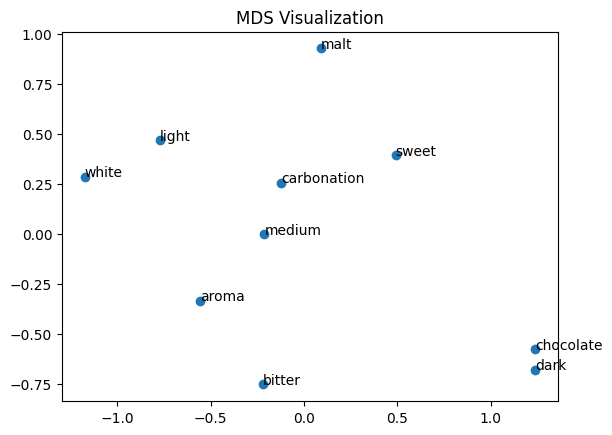

In [95]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dissim = np.divide(1, mtx, where=mtx!=0)
df_np = pd.DataFrame(dissim)
df_np.to_excel("dissimilarity matrix.xlsx")

dissim[4,9] = 3.5
dissim[9,4] = 3.5

row, col = dissim.shape

df_np = pd.DataFrame(dissim)

#Initialize the MDS model
distance_matrix = dissim
mds = MDS(n_components=2, dissimilarity="precomputed")
#Fit the model to the distance matrix and transform the data to the lower-dimensional space
lower_dimensional_data = mds.fit_transform(distance_matrix)
#Plot the lower-dimensional representation as a scatter plot
plt.scatter(lower_dimensional_data[:, 0], lower_dimensional_data[:, 1])

#Add labels for the data points (optional)
labels = attributes_list
for label, x, y in zip(labels, lower_dimensional_data[:, 0], lower_dimensional_data[:, 1]):
    plt.annotate(label, (x, y))

plt.title('MDS Visualization')
plt.show()

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Sample DataFrame with 5000++ reviews (assuming you have a similar structure)
text1 = 'medium aroma carbonation' #3 selected attributes
text2 = df['Review'].tolist()
cos_similarity = []

for review in text2:
    
    documents = [text1, review]
    count_vectorizer = CountVectorizer(stop_words='english')
    sparse_matrix = count_vectorizer.fit_transform(documents)
    doc_term_matrix = sparse_matrix.todense()
    cos_sim = cosine_similarity(np.array(doc_term_matrix[0]), np.array(doc_term_matrix[1]))
    cos_similarity.append(cos_sim[0][0])
df['similarity'] = cos_similarity  
df.to_excel("similarity4.xlsx", index=False)  

In [97]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
count = 0
for text in df_words['Word']:
    if count == 1001:
        break
    # Word for which you want to get the sentiment score
    word = text
    # Get the sentiment score of the word
    word_sentiment_score = analyzer.polarity_scores(word)['compound']
    # Print the sentiment score
    print(f"{count}. The sentiment score of '{word}' is: {word_sentiment_score}")
    count += 1

0. The sentiment score of 'beer' is: 0.0
1. The sentiment score of 'head' is: 0.0
2. The sentiment score of 'taste' is: 0.0
3. The sentiment score of 'dark' is: 0.0
4. The sentiment score of 'good' is: 0.4404
5. The sentiment score of 'malt' is: 0.0
6. The sentiment score of 'light' is: 0.0
7. The sentiment score of 'like' is: 0.3612
8. The sentiment score of 'sweet' is: 0.4588
9. The sentiment score of 'nice' is: 0.4215
10. The sentiment score of 'medium' is: 0.0
11. The sentiment score of 'one' is: 0.0
12. The sentiment score of 'aroma' is: 0.0
13. The sentiment score of 'carbonation' is: 0.0
14. The sentiment score of 'finish' is: 0.0
15. The sentiment score of 'chocolate' is: 0.0
16. The sentiment score of 'overall' is: 0.0
17. The sentiment score of 'hops' is: 0.0
18. The sentiment score of 'well' is: 0.2732
19. The sentiment score of 'flavor' is: 0.0
20. The sentiment score of 'notes' is: 0.0
21. The sentiment score of 'white' is: 0.0
22. The sentiment score of 'bottle' is: 0.0
2

In [98]:
analyzer = SentimentIntensityAnalyzer()

# Define a custom sentiment lexicon
custom_lexicon = {
    'bitter': 0, 
    'bitterness': 0,
    'sweetness': 0,
    'sweet':0
}

# Update the VADER lexicon with the custom lexicon
analyzer.lexicon.update(custom_lexicon)

sentiment_score = []

for index, row in df.iterrows():

    text = row['Review']
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    sentiment_score.append(compound_score)

df['sentiment'] = sentiment_score
df.to_excel("sentiment.xlsx", index=False)  

In [99]:
df['recommendation_score'] = df['similarity']*df['sentiment']
df.to_excel("evaluation_score.xlsx", index=False)  

df.groupby(['Beer','Company']).agg(Median=("recommendation_score","median"), Average=("recommendation_score","mean"),Stdev=("recommendation_score","std"),Min=("recommendation_score","min"),Max=("recommendation_score","max")).sort_values('Median', ascending=False).head(10)

,,Median,Average,Stdev,Min,Max
Beer,Company,,,,,
Ruthless Rye IPA,Sierra Nevada Brewing Co.,0.084414,0.079411,0.070342,0.000000,0.217940
Maudite,Unibroue,0.079350,0.073615,0.067009,-0.139553,0.191842
Smoked Porter,Stone Brewing,0.075141,0.084960,0.065612,0.000000,0.184634
Duet,Alpine Beer Company,0.072401,0.094157,0.090600,0.000000,0.282708
La Fin Du Monde,Unibroue,0.071983,0.064622,0.065642,0.000000,0.226747
A Little Sumpin' Wild,Lagunitas Brewing Company,0.071527,0.059664,0.057209,-0.000000,0.160255
Saison Dupont,Brasserie Dupont sprl,0.070911,0.074439,0.077194,0.000000,0.264793
Trois Pistoles,Unibroue,0.070466,0.064130,0.048661,0.000000,0.165913
Nut Brown Ale,Samuel Smith Old Brewery (Tadcaster),0.068655,0.071016,0.067163,0.000000,0.201504


In [100]:
df_top3 = df.groupby(['Beer','Company']).agg(Median=("recommendation_score","median"), Average=("recommendation_score","mean"),Stdev=("recommendation_score","std"),Min=("recommendation_score","min"),Max=("recommendation_score","max")).sort_values('Median', ascending=False).reset_index().head(3)
print(df_top3[['Beer','Company']])

               Beer                    Company
0  Ruthless Rye IPA  Sierra Nevada Brewing Co.
1           Maudite                   Unibroue
2     Smoked Porter              Stone Brewing


This is where we would recommend beers to our customer! 
Based on the attributes given by our customer, which in this case are 'medium', 'aroma', and 'carbonation', we would recommend the three products listed above, in that order. Specifically, first would be Ruthless Rye IPA by Sierra Nevada Brewing Co., second would be Maudite by Unibroue, and third would be Smoked Porter by Stone Brewing.

In [101]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
# remove stopwords for spacy as well
# this is an example to compare spacy (uses word embeddings) and basic cosine similarity
# we will calculate the similarity between two documents of unequal length (see below)

nlp = spacy.load('en_core_web_md')

df_spacy = pd.read_csv('output2.csv')  # Load your reviews data

text1 = 'medium aroma carbonation' #3 selected attributesdoc1 = nlp(text1)
doc1 = nlp(text1)
text2 = df_spacy['Review'].tolist()
spacy_similarity = []

for review in text2:
    doc2 = nlp(review)
    spacy_similarity.append(doc1.similarity(doc2))
    
df_spacy['similarity'] = spacy_similarity  
df_spacy.to_excel("similarity_spacy.xlsx", index=False)  

/var/folders/5c/gfz6fx751xx6p6pl61y85btc0000gn/T/ipykernel_48632/1350938783.py:20: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  spacy_similarity.append(doc1.similarity(doc2))


In [102]:
analyzer = SentimentIntensityAnalyzer()

# Define a custom sentiment lexicon
custom_lexicon = {
    'bitter': 0, 
    'bitterness': 0,
    'sweetness': 0,
    'sweet':0
}

# Update the VADER lexicon with the custom lexicon
analyzer.lexicon.update(custom_lexicon)

sentiment_score = []

for index, row in df_spacy.iterrows():

    text = row['Review']
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    sentiment_score.append(compound_score)
    #print("Compound Score:", compound_score)

df_spacy['sentiment'] = sentiment_score
df_spacy.to_excel("sentiment_spacy.xlsx", index=False)  

In [103]:
df_spacy['recommendation_score'] = df_spacy['similarity']*df_spacy['sentiment']
df_spacy.to_excel("evaluation_score_spacy.xlsx", index=False)  

df_spacy.groupby(['Beer','Company']).agg(Median=("recommendation_score","median"), Average=("recommendation_score","mean"),Stdev=("recommendation_score","std"),Min=("recommendation_score","min"),Max=("recommendation_score","max")).sort_values('Median', ascending=False).head(10)

,,Median,Average,Stdev,Min,Max
Beer,Company,,,,,
Hunahpu's Imperial Stout,Cigar City Brewing,0.612612,0.481497,0.243029,-0.182917,0.644212
Black Note Stout,Bell's Brewery - Eccentric Café & General Store,0.602776,0.398110,0.308133,-0.276198,0.660618
Abrasive Ale,Surly Brewing Company,0.602300,0.565250,0.102129,0.281306,0.692999
Trappist Tripel,Brouwerij Westmalle,0.592803,0.492982,0.206639,-0.016636,0.642926
Delirium Tremens,Brouwerij Huyghe,0.585886,0.481966,0.185408,0.031315,0.691270
Gueuze 100% Lambic,Brasserie Cantillon,0.581705,0.450349,0.236810,-0.298970,0.663772
Oberon,Bell's Brewery - Eccentric Café & General Store,0.581332,0.435181,0.243094,-0.129549,0.635819
Darkness,Surly Brewing Company,0.580473,0.447747,0.242596,-0.118553,0.674127
Maudite,Unibroue,0.579727,0.501807,0.238011,-0.451227,0.721742


This is the new top 10 recommendations that we would give to our customer using word vectors. The top 3 recommended beers are all different from the original recommendation using cosine similarity. Furthermore, only one of the previous three beers that we recommended still appear among the top 10 ranked beers for our customer using word vectors, which is Maudite by Unibroue.

In [104]:
df_spacy_recommend=df_spacy.groupby(['Beer','Company']).agg(Median=("recommendation_score","median"), Average=("recommendation_score","mean"),Stdev=("recommendation_score","std"),Min=("recommendation_score","min"),Max=("recommendation_score","max")).sort_values('Median', ascending=False).reset_index()
df_spacy_recommend['Rank']=df_spacy_recommend.index+1

df_spacy_recommend.head(10)['Beer'].to_list()

["Hunahpu's Imperial Stout",
 'Black Note Stout',
 'Abrasive Ale',
 'Trappist Tripel',
 'Delirium Tremens',
 'Gueuze 100% Lambic',
 'Oberon',
 'Darkness',
 'Maudite',
 'Guinness Extra Stout (Original)']

In [105]:
df_spacy[df_spacy['Beer']=="Hunahpu's Imperial Stout"]

def has_word_or_similar_word(text, word):
    doc = nlp(text)
    for token in doc:
        # Check if the token is "aroma" or has similarity with "aroma"
        if token.text == word:
            return True
        elif token.similarity(nlp(word)) > 0.7:  # Adjust the similarity threshold as needed
            return True
    return False

def has_exact_word(text, word):
    doc = nlp(text)
    for token in doc:
        # Check if the token is "aroma" or has similarity with "aroma"
        if token.text == word:
            return True
    return False

attributes = ['aroma', 'carbonation', 'medium']
total_count = 0
for word in attributes:
    count = 0
    for text in df_spacy[df_spacy['Beer']=="Hunahpu's Imperial Stout"]['Review'].to_list():
        if has_word_or_similar_word(text, word):
            count += 1
    print(f"Number of texts with {word} or similar words using word embeddings: {count}")
    total_count += count
print(f"Number of texts with our attributes or similar words using word embeddings: {total_count}")

total_count = 0
for word in attributes:
    count = 0
    for text in df_spacy[df_spacy['Beer']=="Hunahpu's Imperial Stout"]['Review'].to_list():
        if has_exact_word(text, word):
            count += 1
    print(f"Number of texts with {word} : {count}")
    total_count += count
print(f"Number of texts with our attributes : {total_count}")

/var/folders/5c/gfz6fx751xx6p6pl61y85btc0000gn/T/ipykernel_48632/3376242232.py:9: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  elif token.similarity(nlp(word)) > 0.7:  # Adjust the similarity threshold as needed


Number of texts with aroma or similar words using word embeddings: 9
Number of texts with carbonation or similar words using word embeddings: 5
Number of texts with medium or similar words using word embeddings: 6
Number of texts with our attributes or similar words using word embeddings: 20
Number of texts with aroma : 2
Number of texts with carbonation : 5
Number of texts with medium : 6
Number of texts with our attributes : 13


From here, we can more objectively observe the difference between the original cosine similarity and our word vectors recommender scores. Specifically, we are measuring how many posts for the beer Hunahpu's Imperial Stout have our three attributes. We can see that from an approach only considering exact word matching, which is used in cosine similarity, there are only 2 reviews that contain the word 'aroma'. This means that from a cosine similarity perspective, this beer will not be a good recommendation to our customer who requests a beer where the aroma is a highlight of the product. However, when moving on to word embeddings and searching for words that are similar to aroma and will be captured through our word vector similarity measure, aroma now appears in 9 reviews. This means that using a word vector approach to calculate similarity, we are able in this case to more accurately deterimine which beers inspire people based on the specific attributes we are searching for. However, it is also worth noting that the same effect was not observed for the word 'carbonation'. This may be due to the fact that carbonation may be a more niche quality that customers will explicity mention when present in the products.

In [106]:
df_1 = pd.read_csv('output2.csv')
highest_rated_beer=df_1.groupby(['Beer','Company']).agg( Average=("Rating","mean")).reset_index().sort_values('Average', ascending=False).head(3)['Beer'].to_list()

df_spacy[df_spacy['Beer'].isin(highest_rated_beer)].groupby(['Beer','Company']).agg(Median=("recommendation_score","median"))


,,Median
Beer,Company,
Heady Topper,The Alchemist,0.482353
Pliny The Younger,Russian River Brewing Company,0.489613
Trappist Westvleteren 12 (XII),Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren),0.512576


In [107]:
df_1.groupby(['Beer','Company']).agg(Average_Rating=("Rating","mean")).reset_index().sort_values('Average_Rating', ascending=False).head(3)

,Beer,Company,Average_Rating
225,Trappist Westvleteren 12 (XII),Brouwerij Westvleteren (Sint-Sixtusabdij van W...,4.721250
166,Pliny The Younger,Russian River Brewing Company,4.701053
96,Heady Topper,The Alchemist,4.670417


In [108]:
df_spacy_recommend[df_spacy_recommend['Beer'].isin(highest_rated_beer)][['Beer','Rank']]

,Beer,Rank
84,Trappist Westvleteren 12 (XII),85
128,Pliny The Younger,129
148,Heady Topper,149


By selecting beers purely based on the overall rating of the product, we find that our recommendation becomes much worse. The three beers listed above would be our recommendation ignoring similarity and sentiment, and going purely based on overall ratings. When checking the rankings of these beers based on our similarity and sentiment analysis, we find that the beers are very low ranked for the attributes that our customer wants, with these beers ranked 85, 129, and 149 overall relative to the other beers. This means that relative to other alternatives, these beers do not meet the requirements of the customer, as they have a relatively low match with the attributes that the customer requested. 

In [109]:
df_words = pd.read_csv("Word_Count_Output_Exclude_StopWord.csv") #can comment this line
list_of_beer = ["Hunahpu's Imperial Stout", 'Trappist Westvleteren 12 (XII)', 'Pliny The Younger', 'Heady Topper', 'Delirium Tremens',
 'Gueuze 100% Lambic',
 'Oberon',
 'Darkness',
 'Maudite',
 'Guinness Extra Stout (Original)']
list_of_attribute = ['dark', 'malt', 'light', 'sweet']

In [110]:
#x is for beer
#y is for attributes
def lift_ratio_2(x, y,df):
    df_temp = df[df['Beer']==x] 

    word_counter = 0
    for idx in df_temp.index:
        words = "".join([char.lower() if char.lower() in """abcdefghijklmnopqrstuvwxyz'""" else '-' for char in df['Review'][idx]])
        words = re.sub('-+', ' ', words)
        words = words.split()
        words = set(words)
        if y in words:
            word_counter += 1
    
    count_y = 0
    for idx in df.index:
        words = "".join([char.lower() if char.lower() in """abcdefghijklmnopqrstuvwxyz'""" else '-' for char in df['Review'][idx]])
        words = re.sub('-+', ' ', words)
        words = words.split()
        words = set(words)
        if y in words:
            count_y += 1
    
    count_x = len(df_temp)
    n_sample = len(df.index)
    lift = (word_counter*n_sample)/(count_x *count_y)
    return lift

mtx_t = [[float(0) for i in range(len(list_of_beer))] for i in range(len(list_of_attribute))]

mtx_t = np.array(mtx_t).T

for x in range(len(list_of_beer)):
    for y in range(len(list_of_attribute)):
            print(list_of_beer[x],list_of_attribute[y])
            lift = lift_ratio_2(list_of_beer[x],list_of_attribute[y],df)
            mtx_t[x,y] = lift
            print(lift)

df_brand_attribute = pd.DataFrame(mtx_t, columns = list_of_attribute, index = list_of_beer)

Hunahpu's Imperial Stout dark
2.3829166666666666
Hunahpu's Imperial Stout malt
0.7948575399583043
Hunahpu's Imperial Stout light
1.448581560283688
Hunahpu's Imperial Stout sweet
2.080176669264744
Trappist Westvleteren 12 (XII) dark
1.67548828125
Trappist Westvleteren 12 (XII) malt
1.1177684155663656
Trappist Westvleteren 12 (XII) light
1.086436170212766
Trappist Westvleteren 12 (XII) sweet
1.3929754481683554
Pliny The Younger dark
0.23515625
Pliny The Younger malt
0.20917303683113272
Pliny The Younger light
0.9148936170212766
Pliny The Younger sweet
0.9384255650818394
Heady Topper dark
0.37233072916666665
Heady Topper malt
0.49678596247394025
Heady Topper light
0.181072695035461
Heady Topper sweet
0.7429202390231229
Delirium Tremens dark
0.42552083333333335
Delirium Tremens malt
0.5677553856845031
Delirium Tremens light
0.8277608915906788
Delirium Tremens sweet
1.6981034034814237
Gueuze 100% Lambic dark
0.17871875
Gueuze 100% Lambic malt
0.47691452397498263
Gueuze 100% Lambic light
1.7

In [111]:
rounded_matrix = np.round(mtx_t, decimals=2)

mtx_present=np.vstack([list_of_attribute, rounded_matrix])

h=["Beer"]
h.extend(list_of_beer)

mtx_present=np.hstack([np.array(h).reshape(-1,1), mtx_present])

table = tabulate(mtx_present, tablefmt='grid')
print("Lift Ratio table:\n",table)

Lift Ratio table:
 +---------------------------------+------+------+-------+-------+
| Beer                            | dark | malt | light | sweet |
+---------------------------------+------+------+-------+-------+
| Hunahpu's Imperial Stout        | 2.38 | 0.79 | 1.45  | 2.08  |
+---------------------------------+------+------+-------+-------+
| Trappist Westvleteren 12 (XII)  | 1.68 | 1.12 | 1.09  | 1.39  |
+---------------------------------+------+------+-------+-------+
| Pliny The Younger               | 0.24 | 0.21 | 0.91  | 0.94  |
+---------------------------------+------+------+-------+-------+
| Heady Topper                    | 0.37 | 0.5  | 0.18  | 0.74  |
+---------------------------------+------+------+-------+-------+
| Delirium Tremens                | 0.43 | 0.57 | 0.83  | 1.7   |
+---------------------------------+------+------+-------+-------+
| Gueuze 100% Lambic              | 0.18 | 0.48 | 1.74  | 0.53  |
+---------------------------------+------+------+-------+

In [112]:
# Choose a target beer (e.g., Beer1)
target_beer = 'Heady Topper'

# Calculate squared errors for each row relative to the target row
target_row = df_brand_attribute.loc[target_beer]
df_brand_attribute['Squared_Error'] = ((df_brand_attribute - target_row) ** 2).sum(axis=1)

# Display the result
print(df_brand_attribute)


                                     dark      malt     light     sweet  \
Hunahpu's Imperial Stout         2.382917  0.794858  1.448582  2.080177   
Trappist Westvleteren 12 (XII)   1.675488  1.117768  1.086436  1.392975   
Pliny The Younger                0.235156  0.209173  0.914894  0.938426   
Heady Topper                     0.372331  0.496786  0.181073  0.742920   
Delirium Tremens                 0.425521  0.567755  0.827761  1.698103   
Gueuze 100% Lambic               0.178719  0.476915  1.738298  0.534903   
Oberon                           0.000000  1.555156  1.700509  0.581416   
Darkness                         3.026689  1.410231  1.261668  1.437910   
Maudite                          1.323843  1.030371  1.126675  1.650934   
Guinness Extra Stout (Original)  1.985764  1.324763  1.690012  0.990560   

                                 Squared_Error  
Hunahpu's Imperial Stout              7.526136  
Trappist Westvleteren 12 (XII)        3.326094  
Pliny The Younger          

In [113]:
print(df_brand_attribute.sort_values('Squared_Error', ascending=True).head(2))

                       dark      malt     light     sweet  Squared_Error
Heady Topper       0.372331  0.496786  0.181073  0.742920       0.000000
Pliny The Younger  0.235156  0.209173  0.914894  0.938426       0.678254


We chose the beer 'Heady Topper', and compared it with other beers on the attributes of 'dark', 'light', 'sweet', and 'malt'. To measure the distance between this beer with other beers, we chose the metric of sum of squared distances, where we took the distance between the lift of each beer and the lift of our selected beer for each attributes, and summed the square of these distances. From this we were able to find that the beer "Pliny The Younger' is the most similar out of the beers that we tested to our selected beer. This procedure could be scaled up to the entire beer set, where we can find the specific lift of a beer for a set of attributes, and then find which other products have the closest match to this beer with the given attributes. This beer could then be recommended to a customer who expresses that he enjoys a specific beer.
This method that we selected to find the most similar beer favors the matching of two beers based on all of the attributes. Different approaches should also be considered if instead of finding the beer that has the least difference over all attributes, we decide to instead choose a beer that is most similar for a given subset of attributes.